In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%ls data

nyc_data.csv* nyc_fare.csv*


In [3]:
data_filename = 'data/nyc_data.csv'
fare_filename = 'data/nyc_fare.csv'

In [5]:
data = pd.read_csv(data_filename,
                  parse_dates =['pickup_datetime',
                                'dropoff_datetime'])
fare = pd.read_csv(fare_filename,
                  parse_dates=['pickup_datetime'])

In [6]:
data.head(3)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392


In [7]:
data.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [8]:
p_lat = data.pickup_latitude
p_lng = data.pickup_longitude
d_lng = data.dropoff_longitude
d_lat = data.dropoff_latitude

In [9]:
p_lng

0        -73.955925
1        -74.005501
2        -73.969955
3        -73.991432
4        -73.966225
            ...    
846940   -73.992058
846941   -73.994949
846942   -73.993492
846943   -73.978477
846944   -73.987206
Name: pickup_longitude, Length: 846945, dtype: float64

In [14]:
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi/180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi)/2.0)/2.0)
    x = 100 * (lng +180)/360
    y = 100 * (lat_rad - np.pi)/(2.0 * np.pi)
    return (x,y)

In [15]:
px, py = lat_lng_to_pixels(p_lat, p_lng)

In [16]:
px

0         29.456688
1         29.442916
2         29.452790
3         29.446824
4         29.453826
            ...    
846940    29.446651
846941    29.445847
846942    29.446252
846943    29.450423
846944    29.447998
Name: pickup_longitude, Length: 846945, dtype: float64

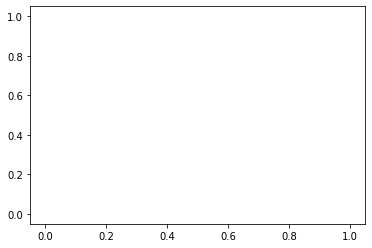

In [17]:
plt.scatter(px, py)